In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# The description column was a textual column which is converted into 
# numerical format by taking mean of all the word embeddings in a single entry

In [4]:
df = pd.read_csv('Final Dataset')
df.head()


,Unnamed: 0.1,Unnamed: 0,Budget Forecast,Total Budget Changes,Total Schedule Changes,Description
0,0,0,35874000.0,493000.0,389.0,-0.005902
1,1,1,41820000.0,-30000.0,0.0,-0.005730
2,2,2,56876000.0,370000.0,134.0,-0.001961
3,3,3,284865000.0,3365000.0,328.0,-0.007788
4,4,4,55026000.0,13699000.0,29.0,-0.003543


In [5]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

# Normalising the data

In [7]:
"""from sklearn.preprocessing import Normalizer
norm = Normalizer()
df = norm.fit_transform(df)
df = pd.DataFrame(df, columns= ['Budget Forecast', 'Total Budget Changes', 'Total Schedule Changes', 'Description Embedding'])
df.head()"""

"from sklearn.preprocessing import Normalizer\nnorm = Normalizer()\ndf = norm.fit_transform(df)\ndf = pd.DataFrame(df, columns= ['Budget Forecast', 'Total Budget Changes', 'Total Schedule Changes', 'Description Embedding'])\ndf.head()"

In [8]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns= ['Budget Forecast', 'Total Budget Changes', 'Total Schedule Changes', 'Description Embedding'])
df.head()

,Budget Forecast,Total Budget Changes,Total Schedule Changes,Description Embedding
0,0.017152,0.322075,0.255512,0.256364
1,0.019703,0.321673,0.165236,0.258221
2,0.026163,0.321981,0.196333,0.298994
3,0.123983,0.324285,0.241355,0.235957
4,0.025369,0.332234,0.171966,0.281878


In [9]:
df['Budget Forecast'].describe().dtype

dtype('float64')

# Splitting the data into train n testing data

In [10]:
x = df.drop(columns = 'Budget Forecast')
y = df['Budget Forecast']

In [11]:
print(x.shape), print(y.shape)

(2840, 3)
(2840,)


(None, None)

In [12]:
y = np.reshape(y, (-1,1))
print(y.shape)

(2840, 1)


In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.3, 
                                   shuffle=True)

In [14]:
#Test size is 30% 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from xgboost import XGBRegressor

lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3, leaf_size=30)
dt = DecisionTreeRegressor(min_samples_leaf=3)
svr = SVR(degree=3, kernel='rbf', gamma='auto', epsilon=0.2)
rf = RandomForestRegressor()
abr = AdaBoostRegressor(n_estimators=50, random_state=2)
xgb = XGBRegressor(n_estimators=45)
etr = ExtraTreesRegressor(n_estimators=50, random_state=2)


# Fitting training data into each model

In [16]:
# Using ML aglorithms:

#Linear Regression
#K Nearest neighbours
#Decision Tree
#Support Vector Machine
#Random Forest
#Artificial Neural Network
#XG Boost
# Extra tree regressor

In [17]:
# Metrics used:
# Mean Squared Error
# Mean absolute error
# R2 Score

In [18]:
models = [lr, knn, dt, svr, rf]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    print(f"MAE for {model} is {mean_absolute_error(y_train, y_pred)}")
    print(f"MSE for {model} is {mean_squared_error(y_train, y_pred)}")
    print(f"R2 Score for {model} is {r2_score(y_train, y_pred)}")
    print(f"RMSE for {model} is {mean_squared_error(y_train, y_pred, squared=False)}")
    
    
    print('\n')

MAE for LinearRegression() is 0.04764652594914497
MSE for LinearRegression() is 0.008943230043749244
R2 Score for LinearRegression() is 0.21371530932678107
RMSE for LinearRegression() is 0.09456865254273873


MAE for KNeighborsRegressor(n_neighbors=3) is 0.02235097104676277
MSE for KNeighborsRegressor(n_neighbors=3) is 0.0024078210114488936
R2 Score for KNeighborsRegressor(n_neighbors=3) is 0.7883054791253166
RMSE for KNeighborsRegressor(n_neighbors=3) is 0.04906955279446608


MAE for DecisionTreeRegressor(min_samples_leaf=3) is 0.009581624175253586
MSE for DecisionTreeRegressor(min_samples_leaf=3) is 0.0006688832607575194
R2 Score for DecisionTreeRegressor(min_samples_leaf=3) is 0.9411920899710263
RMSE for DecisionTreeRegressor(min_samples_leaf=3) is 0.025862777514364527


MAE for SVR(epsilon=0.2, gamma='auto') is 0.16207439889973396
MSE for SVR(epsilon=0.2, gamma='auto') is 0.02948762204701501
R2 Score for SVR(epsilon=0.2, gamma='auto') is -1.5925382290855095
RMSE for SVR(epsilon=0.2

C:\Users\NehA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NehA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE for RandomForestRegressor() is 0.006398016146247989
MSE for RandomForestRegressor() is 0.00021775869441420344
R2 Score for RandomForestRegressor() is 0.9808547552907299
RMSE for RandomForestRegressor() is 0.014756649159419743




# Building dataframe to compare MAE, MSE, R2 SCORE of all models

In [19]:
models = [lr, knn, dt, svr, rf, xgb, etr, abr]
data = []
algos = ['LR' , 'KNN', 'DT', 'SVR', 'RF', 'XGB', 'ETR', 'ABR']
i = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    data.append([algos[i], mean_squared_error(y_train, y_pred), mean_absolute_error(y_train, y_pred), r2_score(y_train, y_pred), mean_squared_error(y_train, y_pred, squared=False)])
    i+=1

    
accuracy = pd.DataFrame(data, columns=['Algo', 'MSE', 'MAE', 'R2', 'RMSE'])

C:\Users\NehA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\NehA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\NehA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\NehA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [20]:
accuracy

,Algo,MSE,MAE,R2,RMSE
0,LR,0.008943,0.047647,0.213715,0.094569
1,KNN,0.002408,0.022351,0.788305,0.049070
2,DT,0.000669,0.009582,0.941192,0.025863
3,SVR,0.029488,0.162074,-1.592538,0.171720
4,RF,0.000231,0.006381,0.979688,0.015200
5,XGB,0.000386,0.011002,0.966061,0.019648
6,ETR,0.000002,0.000105,0.999818,0.001440
7,ABR,0.003777,0.046362,0.667949,0.061455


In [21]:
accuracy.sort_values(by='R2', ascending=0)

,Algo,MSE,MAE,R2,RMSE
6,ETR,0.000002,0.000105,0.999818,0.001440
4,RF,0.000231,0.006381,0.979688,0.015200
5,XGB,0.000386,0.011002,0.966061,0.019648
2,DT,0.000669,0.009582,0.941192,0.025863
1,KNN,0.002408,0.022351,0.788305,0.049070
7,ABR,0.003777,0.046362,0.667949,0.061455
0,LR,0.008943,0.047647,0.213715,0.094569
3,SVR,0.029488,0.162074,-1.592538,0.171720


In [22]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(etr, file)

In [23]:
df.to_csv('Cleaned.csv')

In [24]:
y_pred = etr.predict(X_test)

<BarContainer object of 8 artists>

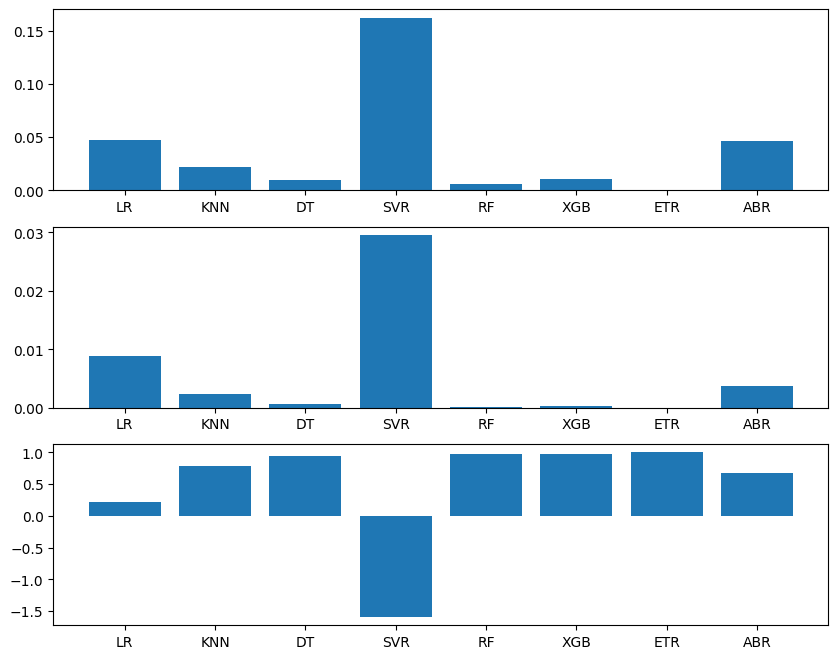

In [25]:
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.bar(accuracy['Algo'], accuracy['MAE'])

plt.subplot(3,1,2)
plt.bar(accuracy['Algo'], accuracy['MSE'])

plt.subplot(3,1,3)
plt.bar(accuracy['Algo'], accuracy['R2'])

In [26]:
accuracy.to_csv('results')

In [30]:
accuracy.rename(columns={'Algo' : 'Model'}, inplace=True)